In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
path = "/content/drive/MyDrive/AI-PROJECTS/sentiment_analysis/IMDB Dataset.csv"
df = pd.read_csv(path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    return text

df["review"] = df["review"].apply(clean_text)
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df["review"], df["sentiment"], test_size=0.2, random_state=42
)


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8953
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



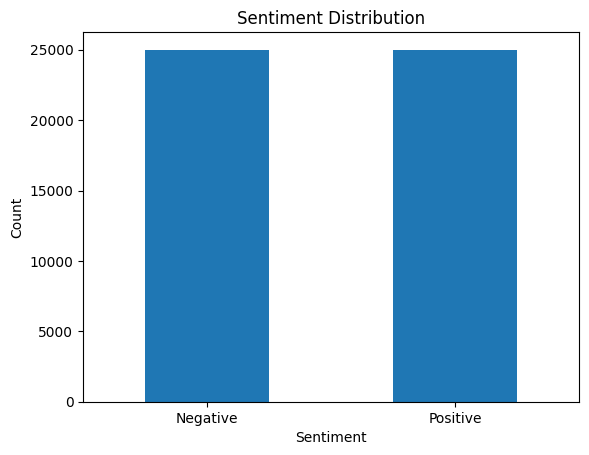

In [10]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="bar")
plt.xticks([0,1], ["Negative", "Positive"], rotation=0)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

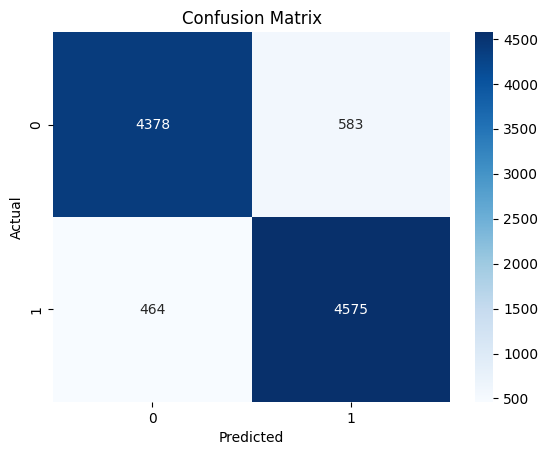

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

top_positive = sorted(zip(coefficients, feature_names), reverse=True)[:10]
top_negative = sorted(zip(coefficients, feature_names))[:10]

print("Top Positive Words:\n", top_positive)
print("\nTop Negative Words:\n", top_negative)

Top Positive Words:
 [(np.float64(7.737227665148721), 'great'), (np.float64(7.15762770706844), 'excellent'), (np.float64(5.35305991603696), 'perfect'), (np.float64(5.150310588755078), 'wonderful'), (np.float64(4.883374220097981), 'best'), (np.float64(4.826394321897003), 'amazing'), (np.float64(4.770987193481546), 'brilliant'), (np.float64(4.349547140570716), 'today'), (np.float64(4.306406073067715), 'loved'), (np.float64(4.213209419390841), 'hilarious')]

Top Negative Words:
 [(np.float64(-10.88584038642578), 'worst'), (np.float64(-7.904651971010538), 'waste'), (np.float64(-7.864983645254833), 'bad'), (np.float64(-7.640304000086252), 'awful'), (np.float64(-7.464669151703137), 'boring'), (np.float64(-6.352074425324253), 'terrible'), (np.float64(-6.298941237216153), 'poor'), (np.float64(-5.520289350762776), 'nothing'), (np.float64(-5.4470230907113475), 'dull'), (np.float64(-5.086648613334296), 'poorly')]
